## Question 1 (Linear Algebra)

Model is $y = X \beta + e$ and Variance of error term $Var(e) = \sum$

Hence, there exists a non singlular matrix T such that $T' \sum T = I$

Consider a non-singular transformation

$Z = T y$

Therefore, $E(Z) = E(T y) = T X \beta = W \beta$

$y = X \beta + e$

$T y = T X \beta + T e$

$Z = W \beta + \eta$

Where, $E(\eta) = E(T e) = T E(e) = 0$

$Var(\eta) = V(T e) = T V(e) T' = T \sum T' = I$

Let's consider $\eta' \eta = (Te)' (Te) = e'T'Te$

$But \ T \sum T' = I$

$\implies \sum = (T'T)^{-1}$

Hence, we find $\eta'\eta = e'\sum e$

To minimize $e'\sum e = (y - X \beta)' \sum^{-1} (y - X \beta) e'\sum e$
$= (y - X \beta)' \sum^{-1} (y - X \beta) = \phi(\beta)$

So, $\phi(\beta) = y'\sum^{-1}y - 2\beta'X'\sum^{-1}y + \beta'X'\sum^{-1}X\beta$

For this equation to minimize, we need to partially differentiate w.r.t to $\beta$ and equate to 0

$\displaystyle \frac{\partial \phi(\beta)}{\partial x}$ $= 0 - 2X'\sum^{-1}y + 2X'\sum^{-1}X\beta$

$\implies X'\sum^{-1}X\beta = X'\sum^{-1}y$

This will be the generalized normal equations

On solving, we get

$\beta = (X'\sum^{-1}X)^{-1}X'\sum^{-1}y$



## Question 2

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def simulate_alpha(n_simulations, fixed_rho, sample_size):
    n_values = [50, 100, 250, 500, 1000]
    estimated_rhos = np.zeros([n_simulations, len(n_values)])
    bias_values = np.zeros([n_simulations, len(n_values)])
    
    for n_index in range(len(n_values)):
        n = n_values[n_index]
        for simulation in range(n_simulations):
            errors = np.random.normal(size=(n,))
            x = errors.copy()
            
            for i in range(1, n):
                x[i] = fixed_rho * x[i - 1] + errors[i]
            
            y_matrix = x[1:]
            x_matrix = x[:-1].reshape(-1, 1)
            x_matrix = np.hstack([np.ones((n - 1, 1)), x_matrix])
            
            estimated_parameters = np.linalg.solve(x_matrix.T @ x_matrix, x_matrix.T @ y_matrix)
            estimated_rhos[simulation, n_index] = estimated_parameters[1]
            bias_values[simulation, n_index] = fixed_rho - estimated_rhos[simulation, n_index]
    
    rss_values = np.zeros([len(n_values), ])
    for n_index in range(len(n_values)):
        for simulation in range(n_simulations):
            rss_values[n_index] += (bias_values[simulation, n_index]) ** 2
    
    print("Residual sum of squares for different sample sizes: ", rss_values)
    print("Bias for different sample sizes: ", bias_values.mean(0))
    
    plt.figure()
    for n_index in range(len(n_values)):
        sns.kdeplot(bias_values[:, n_index], label=n_values[n_index])

def simulate_intercept(n_simulations, fixed_rho, sample_size):
    alpha_values = [-5, 0, 5, 10, 15]
    estimated_rhos = np.zeros([n_simulations, len(alpha_values)])
    bias_values = np.zeros([n_simulations, len(alpha_values)])
    
    for alpha_index in range(len(alpha_values)):
        alpha = alpha_values[alpha_index]
        for simulation in range(n_simulations):
            errors = np.random.normal(size=(n,))
            x = errors.copy()
            
            for i in range(1, n):
                x[i] = alpha + fixed_rho * x[i - 1] + errors[i]
            
            y_matrix = x[1:]
            x_matrix = x[:-1].reshape(-1, 1)
            x_matrix = np.hstack([np.ones((n - 1, 1)), x_matrix])
            
            estimated_parameters = np.linalg.solve(x_matrix.T @ x_matrix, x_matrix.T @ y_matrix)
            estimated_rhos[simulation, alpha_index] = estimated_parameters[1]
            bias_values[simulation, alpha_index] = fixed_rho - estimated_rhos[simulation, alpha_index]
    
    rss_values = np.zeros([len(alpha_values), ])
    for alpha_index in range(len(alpha_values)):
        for simulation in range(n_simulations):
            rss_values[alpha_index] += (bias_values[simulation, alpha_index]) ** 2
    
    print("Residual sum of squares for different alpha values: ", rss_values)
    print("Bias for different alpha values: ", bias_values.mean(0))
    
    plt.figure()
    for alpha_index in range(len(alpha_values)):
        sns.kdeplot(bias_values[:, alpha_index], label=alpha_values[alpha_index])

def simulate_rho(n_simulations, sample_size, fixed_alpha):
    rho_values = [0.1, 0.2, 0.4, 0.6, 0.8]
    estimated_rhos = np.zeros([n_simulations, len(rho_values)])
    bias_values = np.zeros([n_simulations, len(rho_values)])
    
    for rho_index in range(len(rho_values)):
        fixed_rho = rho_values[rho_index]
        for simulation in range(n_simulations):
            errors = np.random.normal(size=(n,))
            x = errors.copy()
            
            for i in range(1, n):
                x[i] = fixed_alpha + fixed_rho * x[i - 1] + errors[i]
            
            y_matrix = x[1:]
            x_matrix = x[:-1].reshape(-1, 1)
            x_matrix = np.hstack([np.ones((n - 1, 1)), x_matrix])
            
            estimated_parameters = np.linalg.solve(x_matrix.T @ x_matrix, x_matrix.T @ y_matrix)
            estimated_rhos[simulation, rho_index] = estimated_parameters[1]
            bias_values[simulation, rho_index] = fixed_rho - estimated_rhos[simulation, rho_index]
    
    rss_values = np.zeros([len(rho_values), ])
    for rho_index in range(len(rho_values)):
        for simulation in range(n_simulations):
            rss_values[rho_index] += (bias_values[simulation, rho_index]) ** 2
    
    print("Residual sum of squares for different rho values: ", rss_values)
    print("Bias for different rho values: ", bias_values.mean(0))
    
    plt.figure(figsize= [10,20])
    for rho_index in range(len(rho_values)):
        sns.kdeplot(bias_values[:, rho_index], label=rho_values[rho_index])
    plt.legend()
    plt.show()

In [5]:
n_simulations = 10000
fixed_rho = 0.4
n = 500
fixed_alpha = 1

Residual sum of squares for different alpha values:  [14.74390576 17.03296022 15.06562013 10.93911428  7.60883835]
Bias for different alpha values:  [0.00392258 0.00431423 0.00446885 0.00248568 0.001825  ]


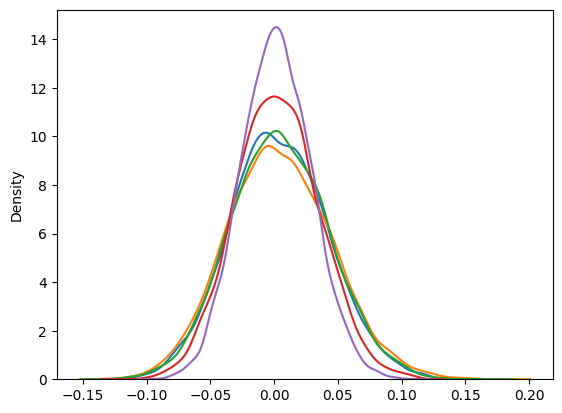

In [12]:
simulate_intercept(n_simulations, fixed_rho, n)

Residual sum of squares for different sample sizes:  [201.62364487  92.20774359  35.09406411  17.1221795    8.42290193]
Bias for different sample sizes:  [0.04633575 0.02101325 0.0102468  0.00390605 0.0020023 ]


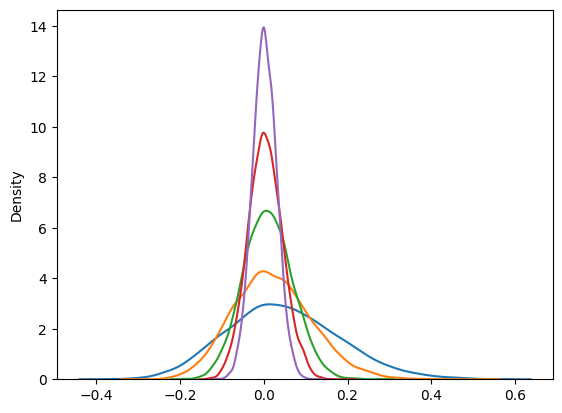

In [13]:
simulate_alpha(n_simulations, fixed_rho, n)

Residual sum of squares for different rho values:  [19.49344066 18.52025885 16.96078994 13.41331326  7.60488367]
Bias for different rho values:  [0.00304494 0.00248547 0.00439095 0.00525319 0.00622783]


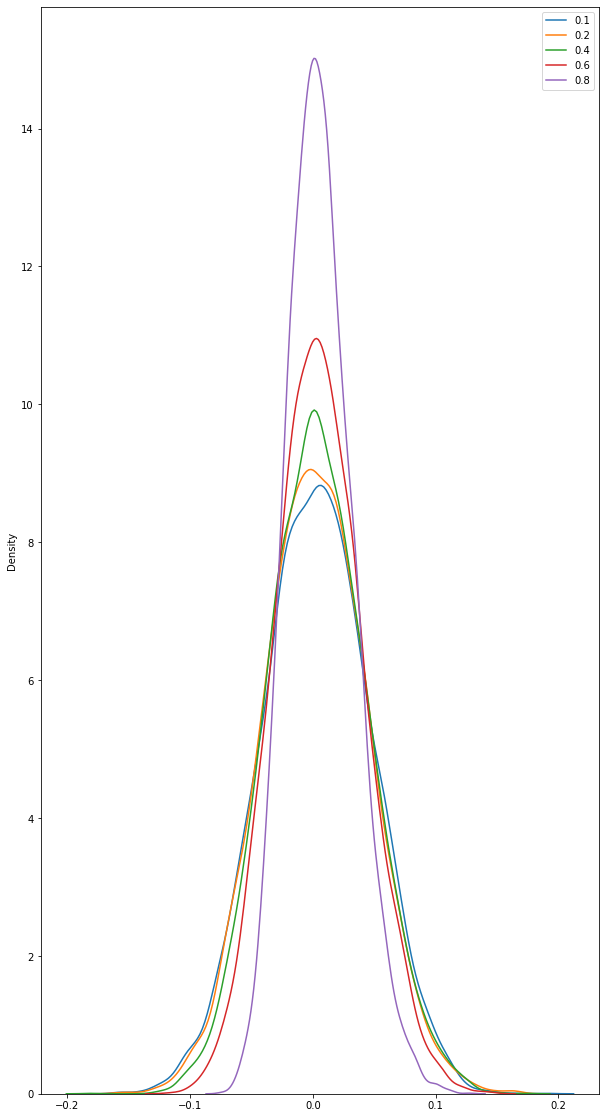

In [6]:
simulate_rho(n_simulations, n, fixed_alpha)